# Шаг 1. Теоретическая часть

## Выведите аналитическое решение задачи регрессии. Используйте векторную форму уравнения

### Шаг 1

У нас есть: 

* $ X \in R^{n * m} $ - входной вектор признаков (n объектов и m признаков)
* $ y \in R^{n} $ - вектор целевой переменной (то есть то, что нам нужно предсказать)

Задача сводится к следующему: нам необходимо найти такие веса $ w \in R^{m} $, чтобы минимизировать MSE (или иными словами Loss-функцию)
### $ L(w, X, y) = 1 / n * ( \sum_{i=1}^n(y_i - w^T*x_i) ) -> min $


### Шаг 2

1. Перезапишем формулу в матричной форме:
* $ L(w) = 1 / n * (y - X*w)^{T} * (y - X*w) $, где y - вектор ответов, X - вектор признаков, w - вектор весов


2. Раскроем скобочки (для фокусирования на задаче я временно уберу 1/n, т.к это консанта -> ее не минимизируешь)
* Формула: $ (A - B)^{T}(A - B) = A^TA - A^TB - B^TA + B^TB $
* Наше выражение: $ (y - Xw)^T * (y - Xw) = y^Ty - y^TXw - (Xw)^Ty + (Xw)^TXw$

3. Упростим выражение 
* Оба выражения $ y^TXw $ и $ (Xw)^Ty $ являются скалярными произведениями, поскольку скалярное произведение коммутативно, то   
 $y^TXw = (Xw)^Ty  $ 

* Получаем новую формулу: $ y^Ty - y^TXw - y^TXw + (Xw)^TXw = y^Ty - 2y^T(Xw) + (Xw)^TXw$

### Шаг 3

После предыдущего шага функция потерь имеет следующий вид: $ L(w, X, y) =  y^Ty - 2y^T(Xw) + (Xw)^TXw-> min $

Итого, мы имеем функцию, у которой хотим найти точку локального минимума -> нужно приравнять производную по w (вектору весов) к нулю $ \frac{{\partial}}{\partial w} [y^Ty - 2y^T(Xw) + (Xw)^TXw] = 0 $


При дифференцировании по w выражение $ y^Ty $ - константа относительно w, её производная равна 0


Остальное выражение «под скобками» раскрываем согласно правилам матричного дифференцирования, а конкретно нужно 2 факта: 
1. Если $ f(x) = a^Tw $, где a - постоянный вектор, то: 
$ \frac{{\partial}}{\partial w} [a^Tw] = a$
2. Если $ f(x) = w^TAw $, где A - симметричная матрица m x m, то: $ \frac{{\partial}}{\partial w} [w^TAw] = 2Aw $


* Производная 1 слагаемого $ -2y^T(Xw) $ : $ y^T(Xw) = (X^Ty)^Tw $, где $ a = (X^Ty)^T $

* Следовательно $ \frac{{\partial}}{\partial w} [-2y^T(Xw)] = -2X^Ty $


* Производная 2 слагаемого $ (Xw)^TXw $: $ (Xw)^TXw = w^T(X^TX)w $, где A - $X^TX$ симметричная матрица размером m x m

* Следовательно $ \frac{{\partial}}{\partial w} [(Xw)^TXw] = 2X^TXw $

Итого $ \frac{{\partial}}{\partial w} [y^Ty - 2y^T(Xw) + (Xw)^TXw] = -2X^Ty + 2X^TXw $

* Упростим уравнение
$ -2X^Ty + 2X^TXw = 0 $

* $ X^TXw = X^Ty $

* $ w = (X^TX)^{-1}*X^T*y $

### $ w^{*} = (X^TX)^{-1}*X^T*y$ - Аналитическое решение линейной регрессии

## Какие изменения произойдут в решении при добавлении L1- и L2-регуляризации к функции потерь?

Функции потерь примут следующий вид: 

* L1: функция $ L(w, X, y) = ||y-Xw||^2 + \lambda||w||_1$
* L2: функция $ L(w, X, y) = ||y-Xw||^2 + \lambda ||w||_2^2$

где 
* $ ||w||_1 = \sum_{i=1}^n |w_i| $
* $ ||w||_2^2= \sum_{i=1}^n w_i^2 $

Аналитические решения:

* L2: $ w^{*} = (X^TX\lambda I)^{-1}*X^T*y$

* L1: модуль недифференцируем в нуле, поэтому явного аналитического решения нет (подбираем веса градиентным спуском)

## Объясните, почему L1-регуляризация часто используется для отбора признаков. Почему после обучения модели остается много весов, равных 0?

L1-регуляризация обнуляет веса, потому что у нее постоянный штраф, а постоянный штраф делает обнуление малых весов выгодным, в отличие от L2-регуляризации, которая имеет непостоянный штраф





## Объясните, как можно использовать те же модели (линейная регрессия, гребневая регрессия и т. д.), но при этом обеспечить возможность учета нелинейных зависимостей.

Используя Polynomial Features можно получить полином n-ой степени, который сможет достаточно хорошо аппроксимировать функцию, описывающую исходное распределение данных в выборке

# Шаг 2. Импорт библиотек и функции

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from collections import Counter
from classes.regression_classes import SimpleLinearRegression, ClassicalGDLinearRegression, SGDLinearRegression
from classes.regression_classes import LassoLinearRegression, RidgeLinearRegression, ElasticNetLinearRegression
from classes.regression_classes import my_MSE, my_MAE, my_R2, my_RMSE

## Фун-я калькуляции метрик

In [2]:
def calculate_metrics(y_true, y_pred, model_name):
    
    return {
        'model': model_name,
        'R2': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)), 
        'MSE': mean_squared_error(y_true, y_pred)
    }

## Фун-я сбора метрик в фрейм

In [3]:
def metrics_to_df(predictions: dict, y_test): 
    metrics_list = [] 

    for model_name, y_pred in predictions.items(): 
        metrics = calculate_metrics(y_test, y_pred, model_name) 
        metrics_list.append(metrics) 
        
    metrics_df = pd.DataFrame(metrics_list)
    return metrics_df

# Фун-я обучения всех моделей

In [4]:
def train_all_models(X_train: np.ndarray | pd.DataFrame, y_train: np.ndarray | pd.DataFrame | pd.Series, X_test: np.ndarray | pd.DataFrame, y_test: np.ndarray | pd.DataFrame | pd.Series) -> pd.DataFrame: 
    simple_model = SimpleLinearRegression()
    sgd_model = SGDLinearRegression(n_iter=100, batch_size=32, learning_rate=0.001) # learning_rate=0.001
    gd_model = ClassicalGDLinearRegression(n_iter=1000, learning_rate=0.001)
    sklearn_model = LinearRegression()
    
    lasso_model = LassoLinearRegression(n_iter=100, batch_size=32, alpha=0.001, learning_rate=0.001) # learning_rate=0.001 alpha=0.001
    ridge_model = RidgeLinearRegression(n_iter=100, batch_size=32, alpha=0.001, learning_rate=0.001)
    elastic_net_model = ElasticNetLinearRegression(n_iter=100, batch_size=32, alpha=0.001, learning_rate=0.001, l1_ratio=0.3)


    original_ridge = Ridge(alpha=0.001)
    original_lasso = Lasso(alpha=0.001) 
    original_elastic_net = ElasticNet(l1_ratio=0.3, alpha=0.001)
    
    simple_model.fit(X_train, y_train) 
    sgd_model.fit(X_train, y_train) 
    gd_model.fit(X_train, y_train) 
    sklearn_model.fit(X_train, y_train) 
    
    lasso_model.fit(X_train, y_train)
    ridge_model.fit(X_train, y_train)
    elastic_net_model.fit(X_train, y_train)

    original_ridge.fit(X_train, y_train)
    original_lasso.fit(X_train, y_train)
    original_elastic_net.fit(X_train, y_train)
    
    simple_model_pred = simple_model.predict(X_test)
    sgd_model_pred = sgd_model.predict(X_test)
    gd_model_pred = gd_model.predict(X_test)
    sklearn_model_pred = sklearn_model.predict(X_test)
    
    lasso_model_pred = lasso_model.predict(X_test)
    ridge_model_pred = ridge_model.predict(X_test)
    elastic_net_model_pred = elastic_net_model.predict(X_test)

    original_ridge_pred = original_ridge.predict(X_test)
    original_lasso_pred = original_lasso.predict(X_test)
    original_elastic_net_pred = original_elastic_net.predict(X_test)
    
    predictions_non_reg = {
        'My ' + simple_model.__class__.__name__: simple_model_pred, 
        'My ' + sgd_model.__class__.__name__: sgd_model_pred, 
        'My ' + gd_model.__class__.__name__: gd_model_pred, 
        'Default ' + sklearn_model.__class__.__name__: sklearn_model_pred
    }

    predictions_with_reg = {
        'My ' + lasso_model.__class__.__name__: lasso_model_pred, 
        'My ' + ridge_model.__class__.__name__: ridge_model_pred, 
        'My ' + elastic_net_model.__class__.__name__: elastic_net_model_pred, 
        'Default ' + original_lasso.__class__.__name__: original_lasso_pred, 
        'Default ' + original_ridge.__class__.__name__: original_ridge_pred, 
        'Default ' + original_elastic_net.__class__.__name__: original_elastic_net_pred
    }
    
    predictions = predictions_non_reg | predictions_with_reg 
    
    return metrics_to_df(predictions, y_test)


In [5]:
def train_overfitting_models(X_train: np.ndarray | pd.DataFrame, y_train: np.ndarray | pd.DataFrame | pd.Series, X_test: np.ndarray | pd.DataFrame, y_test: np.ndarray | pd.DataFrame | pd.Series) -> pd.DataFrame: 
    simple_model = SimpleLinearRegression()
    sgd_model = SGDLinearRegression(n_iter=1000, batch_size=32, learning_rate=1e-6)
    gd_model = ClassicalGDLinearRegression(n_iter=1000, learning_rate=1e-6)
    sklearn_model = LinearRegression()
    
    lasso_model = LassoLinearRegression(n_iter=1000, batch_size=32, alpha=100.0, learning_rate=1e-6) 
    ridge_model = RidgeLinearRegression(n_iter=1000, batch_size=32, alpha=100.0, learning_rate=1e-6)
    elastic_net_model = ElasticNetLinearRegression(n_iter=1000, batch_size=32, alpha=100.0, learning_rate=1e-6, l1_ratio=0.3)


    original_ridge = Ridge(alpha=100.0)
    original_lasso = Lasso(alpha=100.0) 
    original_elastic_net = ElasticNet(l1_ratio=0.3, alpha=100.0)
    
    simple_model.fit(X_train, y_train) 
    sgd_model.fit(X_train, y_train) 
    gd_model.fit(X_train, y_train) 
    sklearn_model.fit(X_train, y_train) 
    
    lasso_model.fit(X_train, y_train)
    ridge_model.fit(X_train, y_train)
    elastic_net_model.fit(X_train, y_train)

    original_ridge.fit(X_train, y_train)
    original_lasso.fit(X_train, y_train)
    original_elastic_net.fit(X_train, y_train)
    
    simple_model_pred = simple_model.predict(X_test)
    sgd_model_pred = sgd_model.predict(X_test)
    gd_model_pred = gd_model.predict(X_test)
    sklearn_model_pred = sklearn_model.predict(X_test)
    
    lasso_model_pred = lasso_model.predict(X_test)
    ridge_model_pred = ridge_model.predict(X_test)
    elastic_net_model_pred = elastic_net_model.predict(X_test)

    original_ridge_pred = original_ridge.predict(X_test)
    original_lasso_pred = original_lasso.predict(X_test)
    original_elastic_net_pred = original_elastic_net.predict(X_test)
    
    predictions_non_reg = {
        'My ' + simple_model.__class__.__name__: simple_model_pred, 
        'My ' + sgd_model.__class__.__name__: sgd_model_pred, 
        'My ' + gd_model.__class__.__name__: gd_model_pred, 
        'Default ' + sklearn_model.__class__.__name__: sklearn_model_pred
    }

    predictions_with_reg = {
        'My ' + lasso_model.__class__.__name__: lasso_model_pred, 
        'My ' + ridge_model.__class__.__name__: ridge_model_pred, 
        'My ' + elastic_net_model.__class__.__name__: elastic_net_model_pred, 
        'Default ' + original_lasso.__class__.__name__: original_lasso_pred, 
        'Default ' + original_ridge.__class__.__name__: original_ridge_pred, 
        'Default ' + original_elastic_net.__class__.__name__: original_elastic_net_pred
    }
    
    predictions = predictions_non_reg | predictions_with_reg 
    
    return metrics_to_df(predictions, y_test)


# Шаг 3. Предобработка и анализ данных

## Считывание данных

In [6]:
train_df = pd.read_json('data/train.json')
test_df = pd.read_json('data/test.json')

In [7]:
train_df.shape, test_df.shape

((49352, 15), (74659, 14))

Трактовка половинок в значениях bathrooms https://vk.com/@lesson.english-chto-nuzhno-znat-ob-amerikanskom-dome

In [8]:
train_df['bathrooms'].unique().tolist()

[1.0, 1.5, 2.0, 0.0, 3.0, 4.0, 2.5, 4.5, 3.5, 5.0, 6.0, 6.5, 5.5, 7.0, 10.0]

## Начальная корреляция признаков друг с другом и с целевой в неочищенном датасете

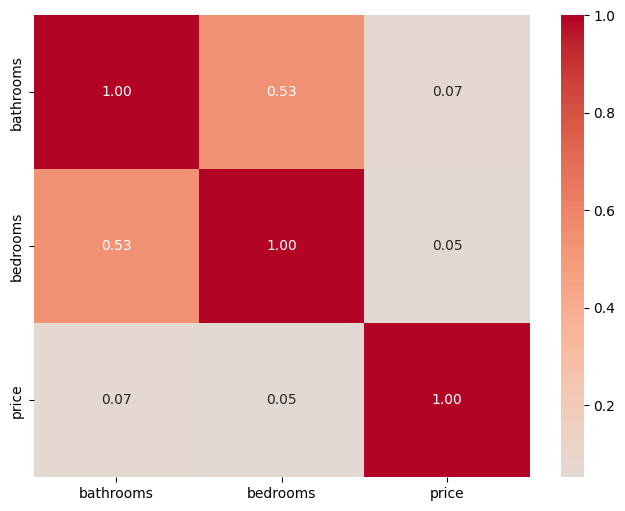

In [9]:
plt.figure(figsize=(8, 6))

corr_matrix = train_df[['bathrooms', 'bedrooms', 'price']].corr(method='pearson')
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.show()

## Очистка тренировочных данных от выборосов

Очень большое среднее отклонение. Нужно проверять на выбросы

In [10]:
train_df['price'].std(), train_df['price'].mean()

(np.float64(22066.86588468626), np.float64(3830.174035500081))

Видно, что у нас имеются выбросы, их нужно почистить/заменить

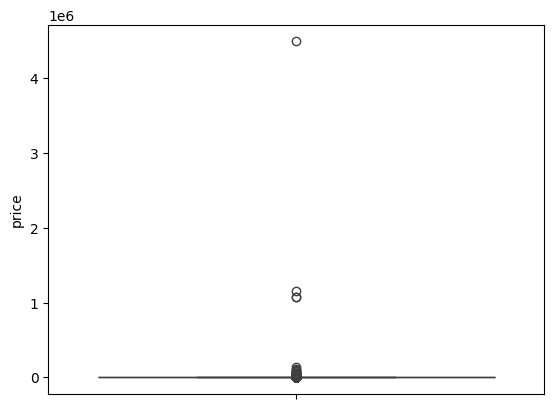

In [11]:
sns.boxplot(y=train_df['price'])
plt.show()

In [12]:
# clean_df = train_df.copy()
upper_bound = train_df['price'].quantile(0.99)
lower_bound = train_df['price'].quantile(0.01)

In [13]:
train_df.loc[train_df['price'] < lower_bound,'price'] = lower_bound
train_df.loc[train_df['price'] > upper_bound,'price'] = upper_bound

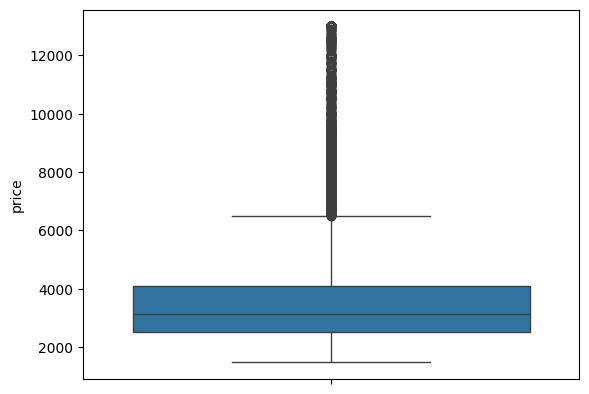

In [14]:
sns.boxplot(y=train_df['price'])
plt.show()

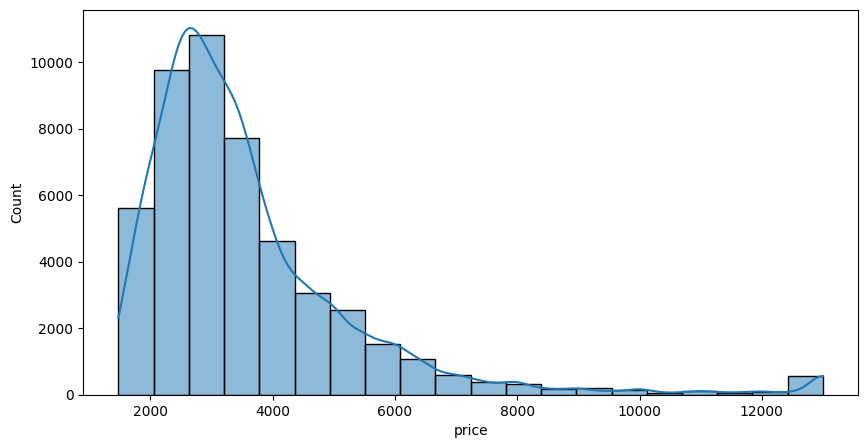

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df, x='price', kde=True, bins=20)
plt.show()

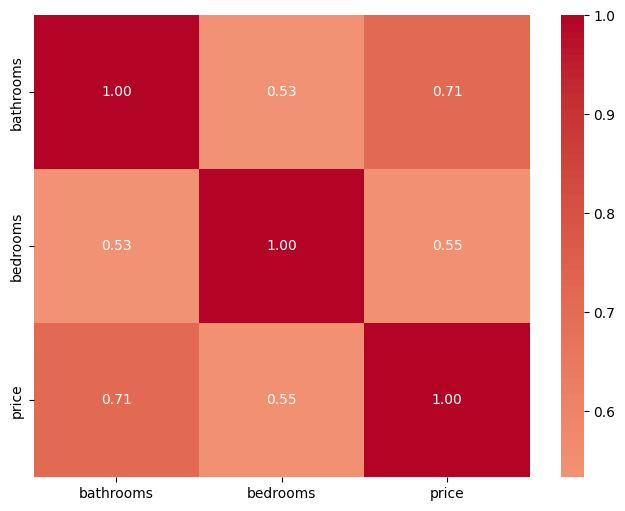

In [16]:
plt.figure(figsize=(8, 6))

corr_matrix = train_df[['bathrooms', 'bedrooms', 'price']].corr(method='pearson')
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.show()

## Преобразование колонки features и определение топ-20 

In [17]:
train_df.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium


In [18]:
train_df['features'] = train_df['features'].apply(lambda x: [i.replace(' ', '').strip(',\'\"') for i in x])

In [19]:
all_features = [] 

for el in train_df['features']: 
    all_features.extend(el)

In [20]:
top_20_features = [i[0] for i in Counter(all_features).most_common(20)]
top_20_features

['Elevator',
 'CatsAllowed',
 'HardwoodFloors',
 'DogsAllowed',
 'Doorman',
 'Dishwasher',
 'NoFee',
 'LaundryinBuilding',
 'FitnessCenter',
 'Pre-War',
 'LaundryinUnit',
 'RoofDeck',
 'OutdoorSpace',
 'DiningRoom',
 'HighSpeedInternet',
 'Balcony',
 'SwimmingPool',
 'LaundryInBuilding',
 'NewConstruction',
 'Terrace']

In [21]:
for feature_name in top_20_features: 
    train_df[feature_name] = train_df['features'].apply(lambda x: 1 if feature_name in x else 0)

In [22]:
feature_list = ['bathrooms', 'bedrooms'] +  top_20_features

# Разбиение на тестовую и тренировочную выборки

In [23]:
features = train_df[feature_list]
target = train_df['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# Шаг 4. Тестирование самописных классов LinearRegression, SGDLinearRegression, GDLinearRegression

## Инициализация и обучение моделек 

In [24]:
simple_model = SimpleLinearRegression()
sgd_model = SGDLinearRegression(n_iter=100, batch_size=32) 
gd_model = ClassicalGDLinearRegression(n_iter=1000)
sklearn_model = LinearRegression()

In [25]:
simple_model.fit(X_train, y_train) 
sgd_model.fit(X_train, y_train) 
gd_model.fit(X_train, y_train) 
sklearn_model.fit(X_train, y_train) 

Training SGDLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training ClassicalGDLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Подсчет метрик для моделей классической линейной регрессии

In [26]:
simple_model_pred = simple_model.predict(X_test)
sgd_model_pred = sgd_model.predict(X_test)
gd_model_pred = gd_model.predict(X_test)
sklearn_model_pred = sklearn_model.predict(X_test)

In [27]:
predictions = {
    'My ' + simple_model.__class__.__name__: simple_model_pred, 
    'My ' + sgd_model.__class__.__name__: sgd_model_pred, 
    'My ' + gd_model.__class__.__name__: gd_model_pred, 
    'Default ' + sklearn_model.__class__.__name__: sklearn_model_pred
}

linear_regression_metrics = metrics_to_df(predictions, y_test)
linear_regression_metrics

,model,R2,MAE,RMSE,MSE
0,My SimpleLinearRegression,0.598355,780.276010,1186.002107,1.406601e+06
1,My SGDLinearRegression,0.598095,783.501769,1186.386775,1.407514e+06
2,My ClassicalGDLinearRegression,0.597120,779.658469,1187.825218,1.410929e+06
3,Default LinearRegression,0.598355,780.276010,1186.002107,1.406601e+06


# Шаг 5. Тестирование самописных классов Lasso, Ridge, ElasticNet

## Инициализация и обучение моделек

In [28]:
lasso_model = LassoLinearRegression(n_iter=100, batch_size=32, alpha=0.001, learning_rate=0.001)
ridge_model = RidgeLinearRegression(n_iter=100, batch_size=32, alpha=0.001, learning_rate=0.001)
elastic_net_model = ElasticNetLinearRegression(n_iter=100, batch_size=32, alpha=0.001, learning_rate=0.001, l1_ratio=0.3)


original_ridge = Ridge()
original_lasso = Lasso() 
original_elastic_net = ElasticNet()

In [29]:
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)

original_ridge.fit(X_train, y_train)
original_lasso.fit(X_train, y_train)
original_elastic_net.fit(X_train, y_train)

Training LassoLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training RidgeLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training ElasticNetLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

,"alpha alpha: float, default=1.0Constant that multiplies the penalty terms. Defaults to 1.0.See the notes for the exact mathematical meaning of thisparameter. ``alpha = 0`` is equivalent to an ordinary least square,solved by the :class:`LinearRegression` object. For numericalreasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.Given this, you should use the :class:`LinearRegression` object.",1.0
,"l1_ratio l1_ratio: float, default=0.5The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` itis an L1 penalty. For ``0 < l1_ratio < 1``, the penalty is acombination of L1 and L2.",0.5
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If ``False``, thedata is assumed to be already centered.",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.Check :ref:`an example on how to use a precomputed Gram Matrix in ElasticNet`for details.",False
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


## Подсчет метрик моделей для моделей линейной регрессии с регуляризацией

In [30]:
lasso_model_pred = lasso_model.predict(X_test)
ridge_model_pred = ridge_model.predict(X_test)
elastic_net_model_pred = elastic_net_model.predict(X_test)

original_ridge_pred = original_ridge.predict(X_test)
original_lasso_pred = original_lasso.predict(X_test)
original_elastic_net_pred = original_elastic_net.predict(X_test)

In [31]:
lasso_model_pred = lasso_model.predict(X_test)
ridge_model_pred = ridge_model.predict(X_test)
elastic_net_model_pred = elastic_net_model.predict(X_test)

original_ridge_pred = original_ridge.predict(X_test)
original_lasso_pred = original_lasso.predict(X_test)
original_elastic_net_pred = original_elastic_net.predict(X_test)

In [32]:
predictions = {
    'My ' + lasso_model.__class__.__name__: lasso_model_pred, 
    'My ' + ridge_model.__class__.__name__: ridge_model_pred, 
    'My ' + elastic_net_model.__class__.__name__: elastic_net_model_pred, 
    'Default ' + original_lasso.__class__.__name__: original_lasso_pred, 
    'Default ' + original_ridge.__class__.__name__: original_ridge_pred, 
    'Default ' + original_elastic_net.__class__.__name__: original_elastic_net_pred
}

regularization_lin_reg_metrics = metrics_to_df(predictions, y_test)
regularization_lin_reg_metrics

,model,R2,MAE,RMSE,MSE
0,My LassoLinearRegression,0.598282,783.734211,1186.110871,1.406859e+06
1,My RidgeLinearRegression,0.598244,783.447440,1186.166127,1.406990e+06
2,My ElasticNetLinearRegression,0.598270,783.631059,1186.127565,1.406899e+06
3,Default Lasso,0.598363,779.328777,1185.991109,1.406575e+06
4,Default Ridge,0.598355,780.268035,1186.003420,1.406604e+06
5,Default ElasticNet,0.460977,871.395895,1373.941405,1.887715e+06


# Шаг 6. Нормализация признаков

## Сначала приведите несколько примеров того, почему и где нормализация признаков является обязательной, и наоборот.

Когда нужна:
* Нормализация признаков необходима при реализации обучения модели Лин.Регрессии с помощью градиентного спуска, так как сходимость градиента напрямую зависит от размера фичи -> например, кол-во комнат (1-6), расстояние до метро (от 0 до 3500 метров) -> по признаку расстояния шаг обновления градиента будет в разы больше -> имеем риск "перескочить" локальный минимум нашей функции потерь (чтобы не перескочить, нужно будет сильно уменьшать learning_rate)

* Также нормализация помогает составить линейной регрессии "адекватное" уравнение, так как ненормализованные признаки могут интерепретироваться в уравнении как критически важные -> они будут вносить больший вклад в итоговое уравнение -> например, цена квартиры = w0 + w1 * (кол-во комнат) + w2 * (расстояние до метро) -> очевидно, что в таком случае w2 получит очень маленькое значение, а w1 большое, таким образом интерпретиация весов признаков, влияющих на предсказание цены, будет являться некорректной. 
Например
* 1. Цена на однушку в москве возле метро  
* 2. Цена на двушку за мкадом без шаговой доступности до метро? 

Человеку очевидно, что дороже будет стоить первая квартира, но если интерпретировать веса модели -> вывод будет другим (кол-во комнат решает)

Когда можно обойтись без нее или вовсе не нужна: 
* Когда признаки в сопоставимых масштабах 
* Теоретически для аналитического решения линейной регрессии нормализация признаков тоже не нужна, так это математически корректно, но есть высокий риск численной нестабильности при плохой обусловленности 
> **Численная нестабильность** – это когда маленькое изменение во входных данных приводят к огромным (непредсказуемым) изменениям в вычислениях матрицы 

## Формуля для MinMaxScaler

### Классический MinMax просто сжимает все значения выборки в диапозон от 0 до 1
* $ X_{scaled} = \frac{(X - X_{min})}{(X_{max} - X_{min})} $
* $ X_{scaled} \in [0, 1] $

### MinMax с добавлением a и b просто сжимает все значения выборки в диапозон от a до b
* $ X_{scaled} = a + \frac{(X - X_{min}) * (b - a)}{(X_{max} - X_{min})} $
* $ X_{scaled} \in [a, b] $

## Разница между MinMaxScaler и StandardScaler

MinMaxScaler: 
* Сжимает данные в диапазон [0, 1] и ограничивает диапазон значений
* Чувствителен к выбросам 

StandardScaler
* Не ограничивает диапазон значений, сохраняет форму распределения данных 
* Не так сильно чувствителен к выбросам

## Фун-я MinMaxScaler

In [33]:
def my_MinMaxScaler(X: np.ndarray, a=0, b=1):
    X_min = X.min() 
    X_max = X.max()
    X_scaled = a + ((X - X_min) * (b - a)) / (X_max - X_min)
    
    return X_scaled

In [34]:
test = np.array([i for i in range(11)]) 
my_MinMaxScaler(test)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [35]:
scaler = MinMaxScaler()
scaler.fit_transform(test.reshape(-1, 1))

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ]])

## Фун-я StandardScaler

In [36]:
# StandardScaler делает так, чтобы все числа имели ср.знач = 0, а стандартное отклонение = 1. По сути он центрирует данные вокруг нуля
def my_StandardScaler(X: np.ndarray): 
    X_mean = X.mean() 
    X_std = X.std() 
    X_standarded = (X - X_mean) / X_std
    
    return X_standarded

In [37]:
my_StandardScaler(test)

array([-1.58113883, -1.26491106, -0.9486833 , -0.63245553, -0.31622777,
        0.        ,  0.31622777,  0.63245553,  0.9486833 ,  1.26491106,
        1.58113883])

In [38]:
std_scaler = StandardScaler()
std_scaler.fit_transform(test.reshape(-1, 1))

array([[-1.58113883],
       [-1.26491106],
       [-0.9486833 ],
       [-0.63245553],
       [-0.31622777],
       [ 0.        ],
       [ 0.31622777],
       [ 0.63245553],
       [ 0.9486833 ],
       [ 1.26491106],
       [ 1.58113883]])

# Шаг 7. Обучите пользовательские модели и модели sklearn на нормализованных данных.

In [39]:
feature_names = X_train.columns.tolist()

min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test) 

In [40]:
models_metrics_with_MinMaxScaler = train_all_models(X_train_scaled, y_train, X_test_scaled, y_test)

Training SGDLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training ClassicalGDLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

Training LassoLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training RidgeLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training ElasticNetLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

In [41]:
std_scaler = StandardScaler()
X_train_std_scaled = std_scaler.fit_transform(X_train)
X_test_std_scaled = std_scaler.transform(X_test) 

In [42]:
models_metrics_with_StandardScaler = train_all_models(X_train_std_scaled, y_train, X_test_std_scaled, y_test)

Training SGDLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training ClassicalGDLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

Training LassoLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training RidgeLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

Training ElasticNetLinearRegression Model:   0%|          | 0/100 [00:00<?, ?it/s]

In [43]:
display(models_metrics_with_MinMaxScaler) 
display(models_metrics_with_StandardScaler)

,model,R2,MAE,RMSE,MSE
0,My SimpleLinearRegression,0.598355,780.276010,1186.002107,1.406601e+06
1,My SGDLinearRegression,0.531343,841.350598,1281.126225,1.641284e+06
2,My ClassicalGDLinearRegression,0.061320,1195.479892,1813.106349,3.287355e+06
3,Default LinearRegression,0.598355,780.276010,1186.002107,1.406601e+06
4,My LassoLinearRegression,0.531343,841.350301,1281.127212,1.641287e+06
5,My RidgeLinearRegression,0.523387,843.776048,1291.955065,1.669148e+06
6,My ElasticNetLinearRegression,0.528606,842.060261,1284.862033,1.650870e+06
7,Default Lasso,0.598355,780.274887,1186.002292,1.406601e+06
8,Default Ridge,0.598355,780.276047,1186.002311,1.406601e+06
9,Default ElasticNet,0.582625,792.731284,1209.003894,1.461690e+06


,model,R2,MAE,RMSE,MSE
0,My SimpleLinearRegression,0.598355,780.276010,1186.002107,1.406601e+06
1,My SGDLinearRegression,0.598373,780.649416,1185.975464,1.406538e+06
2,My ClassicalGDLinearRegression,0.524196,830.380657,1290.858683,1.666316e+06
3,Default LinearRegression,0.598355,780.276010,1186.002107,1.406601e+06
4,My LassoLinearRegression,0.598374,780.649191,1185.975425,1.406538e+06
5,My RidgeLinearRegression,0.598366,780.594908,1185.986134,1.406563e+06
6,My ElasticNetLinearRegression,0.598371,780.630189,1185.979050,1.406546e+06
7,Default Lasso,0.598355,780.275548,1186.002033,1.406601e+06
8,Default Ridge,0.598355,780.276008,1186.002107,1.406601e+06
9,Default ElasticNet,0.598351,780.233808,1186.009267,1.406618e+06


# Шаг 8. Переобученные модели

In [44]:
poly = PolynomialFeatures(degree=10)

In [45]:
X_train_scaled_df, X_test_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_list), pd.DataFrame(X_test_scaled, columns=feature_list)

In [46]:
X_train_for_poly = X_train_scaled_df[['bathrooms', 'bedrooms']]
X_test_for_poly = X_test_scaled_df[['bathrooms', 'bedrooms']]

y_train_for_poly, y_test_for_poly = y_train, y_test

In [47]:
X_train_poly = poly.fit_transform(X_train_for_poly)
X_test_poly = poly.transform(X_test_for_poly) 

In [48]:
y_train_for_poly.shape, y_test_for_poly.shape

((39481,), (9871,))

In [49]:
X_train_poly.shape, X_test_poly.shape

((39481, 66), (9871, 66))

In [50]:
overfitting_models_metrics = train_overfitting_models(X_train_poly, y_train_for_poly, X_test_poly, y_test_for_poly)

Training SGDLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

Training ClassicalGDLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

Training LassoLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

Training RidgeLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

Training ElasticNetLinearRegression Model:   0%|          | 0/1000 [00:00<?, ?it/s]

In [51]:
overfitting_models_metrics

,model,R2,MAE,RMSE,MSE
0,My SimpleLinearRegression,-16048.223989,3341.620377,237078.155582,5.620605e+10
1,My SGDLinearRegression,0.079697,1195.464366,1795.271108,3.222998e+06
2,My ClassicalGDLinearRegression,-3.715829,3607.485742,4063.905151,1.651533e+07
3,Default LinearRegression,-177026.451879,9202.351264,787380.816977,6.199686e+11
4,My LassoLinearRegression,0.055867,1203.057296,1818.365096,3.306452e+06
5,My RidgeLinearRegression,-0.030015,1196.625477,1899.268428,3.607221e+06
6,My ElasticNetLinearRegression,-0.031251,1195.528403,1900.407580,3.611549e+06
7,Default Lasso,0.143724,1135.885108,1731.694786,2.998767e+06
8,Default Ridge,0.479697,880.774320,1349.871894,1.822154e+06
9,Default ElasticNet,0.000107,1259.853381,1871.290349,3.501728e+06
